In [1]:
from significance_analysis.tools import model,cd_diagram, model_builder
from significance_analysis.dataset_management import get_dataset,convert_to_autorank
from autorank import autorank

data_fig5 = get_dataset('fig5_full_anon')
data_fig7 = get_dataset('fig7_anon')

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


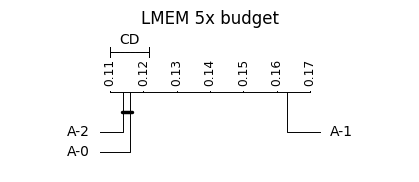

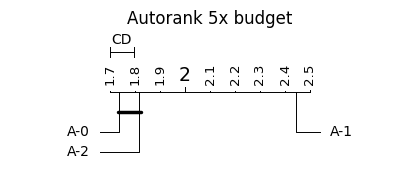

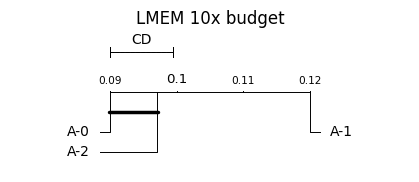

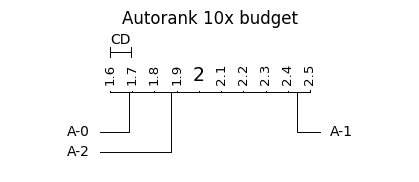

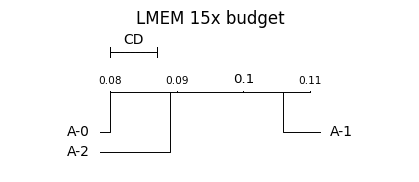

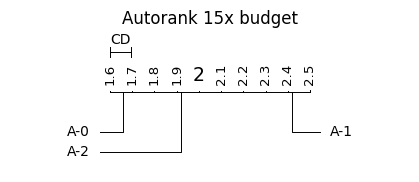

In [2]:
# Contribution 1

for f in [5,10,15]:
    data=data_fig5[data_fig5['used_fidelity']==f]

    # LMEM
    mod=model("normalized_regret~algorithm",data)
    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM {f}x budget')
    fig.savefig(f'contrib1_lmem_f{f}.png',dpi=300,pad_inches=0, bbox_inches="tight")

    # Autorank
    fig=cd_diagram(autorank(convert_to_autorank(data)))
    fig.axes[0].set_title(f'Autorank {f}x budget')
    fig.savefig(f'contrib1_autorank_f{f}.png',dpi=300,pad_inches=0, bbox_inches="tight")

In [5]:
# # Contribution 2

# # Sanity checks on PriorBand-data
# dataset=data_fig5
# dataset=dataset.loc[(dataset["used_fidelity"].isin(range(1,25)))&(dataset["prior"].isin(["at25","bad"]))]

# builder=model_builder(dataset,"normalized_regret","algorithm","benchmark")
# builder.test_seed_dependency()
# builder.test_benchmark_information()
# builder.test_fidelity(fidelity_var="used_fidelity")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


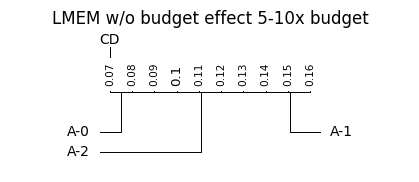

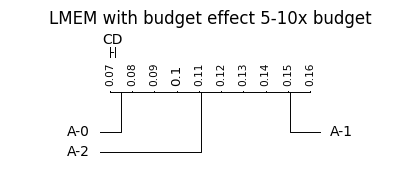

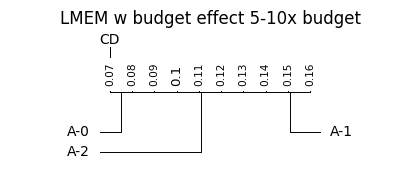

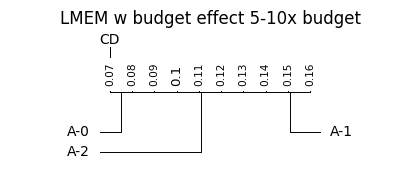

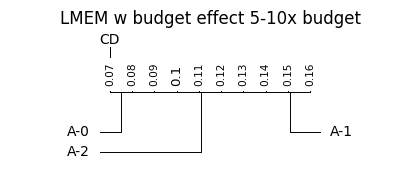

In [2]:
# Contribution 3

for f in [[5,10]]:#,[10,15],[15,20],[5,15]]:
    data=data_fig5[data_fig5['used_fidelity'].between(f[0],f[1])]
    # data['used_fidelity']=data['used_fidelity'].astype(str)

    # LMEM without budget effect
    mod=model("normalized_regret~algorithm+(1|benchmark)",data)
    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM w/o budget effect {f[0]}-{f[1]}x budget')
    fig.savefig(f'contrib3_f{f[0]}-{f[1]}.png',dpi=300,pad_inches=0, bbox_inches="tight")

    # LMEM with budget effect
    mod=model("normalized_regret~algorithm+(algorithm|used_fidelity)+(1|benchmark)",data)

    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM with budget effect {f[0]}-{f[1]}x budget')
    fig.savefig(f'contrib3_budget_f{f[0]}-{f[1]}.png',dpi=300,pad_inches=0, bbox_inches="tight")

    mod=model("normalized_regret~algorithm+algorithm:used_fidelity+(1|benchmark)",data)
    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM w budget effect {f[0]}-{f[1]}x budget')
    fig.savefig(f'contrib3_budget_f{f[0]}-{f[1]}.png',dpi=300,pad_inches=0, bbox_inches="tight")

    mod=model("normalized_regret~algorithm+(1|used_fidelity)+(1|benchmark)",data)
    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM w budget effect {f[0]}-{f[1]}x budget')
    fig.savefig(f'contrib3_budget_f{f[0]}-{f[1]}.png',dpi=300,pad_inches=0, bbox_inches="tight")

    mod=model("normalized_regret~algorithm+used_fidelity+(1|benchmark)",data)
    fig=cd_diagram(mod.post_hoc('algorithm'))
    fig.axes[0].set_title(f'LMEM w budget effect {f[0]}-{f[1]}x budget')
    fig.savefig(f'contrib3_budget_f{f[0]}-{f[1]}.png',dpi=300,pad_inches=0, bbox_inches="tight")